# NLP for Depression Prediction

## Dataset 2: Depression: Twitter Dataset + Feature Extraction

* [Dataset](https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media)

## Model

Like BERT, RoBERTa is “bidirectional,” meaning it considers the context from both the left and the right sides of a token, rather than just the left side as in previous models. This allows RoBERTa to better capture the meaning and context of words in a sentence, leading to improved performance on a variety of NLP tasks. It has achieved state-of-the-art performance on several benchmarks, making it a powerful tool for NLP practitioners.

## Installs

In [2]:
%pip install nltk scikit-learn pandas matplotlib ipympl seaborn

Note: you may need to restart the kernel to use updated packages.


## Imports

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.manifold import TSNE
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Load Dataset

Label column is if the text should be considered depressed

In [4]:
data=pd.read_csv("./datasets/Mental-Health-Twitter.csv", index_col=0)
data.sample(10)
# data.columns

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
18916,814392392581345280,Thu Dec 29 08:47:31 +0000 2016,Hey iNetwork London thanks for the follow!,1458225506,1197,701,1156,61856,0,0
7769,646537842953334784,Wed Sep 23 04:13:28 +0000 2015,RT @JohnnyFootbalI: Coach asked me why I'm thr...,343501537,1383,1029,32804,14827,14964,1
14781,819219922588876800,Wed Jan 11 16:30:24 +0000 2017,Self hating Malays are the worst lmao.,490044008,1849,561,8229,86352,49,0
14479,812404215226269696,Fri Dec 23 21:07:13 +0000 2016,RT @MollyQerim: Real WEAK for George Karl to c...,1497350173,640,445,24297,52892,632,0
3946,558374364010512385,Thu Jan 22 21:23:17 +0000 2015,@Lynx_you_nerd is that like a real thing or,2285922931,43,59,4301,12309,0,1
17743,819020051781038080,Wed Jan 11 03:16:11 +0000 2017,@JCxAlways It was so painful to listen to this...,894149342,44,69,2228,5923,0,0
12088,818675116431134720,Tue Jan 10 04:25:32 +0000 2017,@Chris_Villain @animeimpulseUSA @_dpiddy Okay...,171999132,252,2119,704,1428,0,0
10640,815350265624821761,Sun Jan 01 00:13:46 +0000 2017,@cameronhoodkin stop this i'm bonding with steezy,3249600438,235,185,24407,22302,0,0
15433,816239789758255104,Tue Jan 03 11:08:25 +0000 2017,@kemalrino ...NO YOU JUST RUINED IT,490044008,1849,561,8229,86352,0,0
4907,533328763128676352,Fri Nov 14 18:41:00 +0000 2014,RT @SamStrike: Thanks for the support . Ya bea...,803100541,465,2057,933,2503,101,1


<Axes: xlabel='label', ylabel='count'>

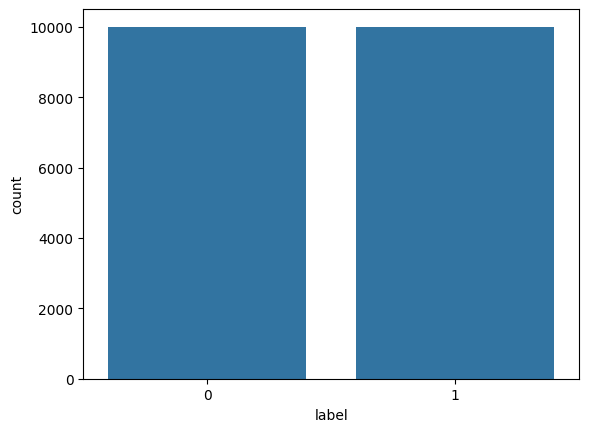

In [5]:
sns.countplot(data=data, x="label")

## Natural Language Processing Libraries

In [6]:
import re
import nltk
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Clean Up

A lemmatizer is a text processing tool used in natural language processing (NLP) to reduce words to their base or root form, known as a lemma. Unlike stemming, which simply chops off the ends of words to return the root form, lemmatization considers the context and meaning of the word.

In [7]:
lemma = nltk.WordNetLemmatizer()
text_list=[]
for text in data.post_text:
    description = re.sub("[^a-zA-Z]"," ",text)                                            # a remover from text without letters
    description = description.lower()
    description = nltk.word_tokenize(text)
    # description = [word for word in text if word not in set(stopwords.words("english"))] Done in vectorize below
    description = [lemma.lemmatize(word) for word in text]                                # lemmatize the words
    description = "".join(description)                                                    # put the words back into a single blob
    text_list.append(description)


## Vectorize the Text

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=280, stop_words="english")   # Use 280 words and remove english stop words
sparce_matrix = count_vectorizer.fit_transform(text_list).toarray()

## Set x and y axis

In [9]:
x = sparce_matrix
y = data["label"].values

In [10]:
tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate=200)
embeddings_3d = tsne.fit_transform(sparce_matrix)

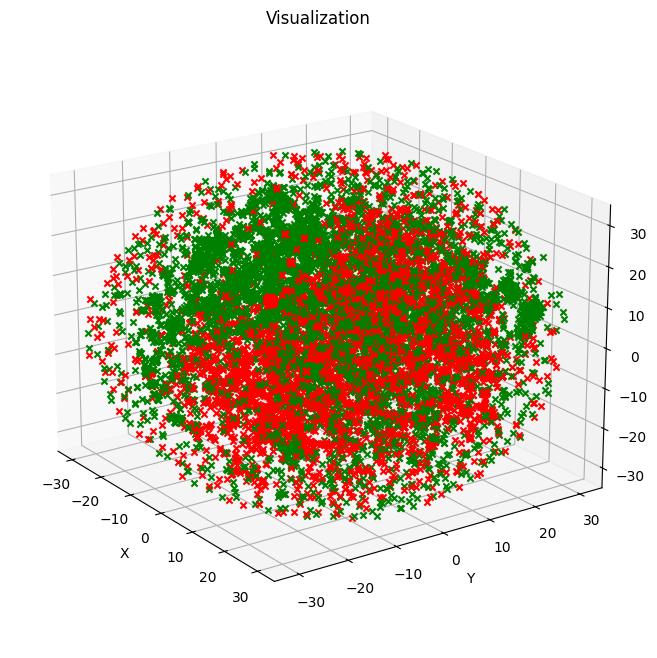

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
clr = {'1': 'green', '0': 'red' }

for i, row in enumerate(embeddings_3d):
    colour = clr[str(data.loc[i, 'label'])]
    # maker = 'o' if data.loc[i, 'sentiment'] >= 0 else 'x'
    marker = 'x'
    ax.scatter(row[0], row[1], row[2], c=colour, marker=marker)

ax.set_title('Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=20, azim=-35)
ax.set_xlim([-35, 35])
ax.set_ylim([-35, 35])
ax.set_zlim([-35, 35])

plt.show()


## Split into train and test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Algorithm to predict depression

Gaussian Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem, used primarily for classification tasks. It's called "naive" because it assumes that the features are independent of each other, which is often not the case in real-world data. Despite this simplifying assumption, it often performs well and is widely used due to its simplicity and efficiency.

In [13]:
from sklearn.naive_bayes import GaussianNB
ga=GaussianNB()
ga.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


## Testing

In [14]:
ga.score(x_test, y_test)

0.7351666666666666

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ga.predict(x_test))

array([[2625,  358],
       [1231, 1786]])